In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import geopandas as gpd
#exécuté en 7s

# Téléchargement des données

In [157]:
#téléchargement des données geojson des départements
url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departements = gpd.read_file(url)
departements.set_index("nom", inplace=True)

#téléchargement des données geojson des régions
url = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
regions = gpd.read_file(url)
regions.set_index("nom", inplace=True)

#téléchargement des données geojson des communes (très long)
url = "https://france-geojson.gregoiredavid.fr/repo/communes.geojson"
communes = gpd.read_file(url)
communes.set_index("code", inplace=True)
communes["centroid_col"] = communes.centroid
communes = communes.set_geometry('centroid_col')

#chargement de la correspondance de codes postaux avec les codes insee
code_postaux_insee = pd.read_csv("cartes/communes.csv", sep=";")
code_postaux_insee = code_postaux_insee.loc[:,["Code INSEE", "Code Postal"]]
post_code_mutliple = code_postaux_insee[code_postaux_insee["Code Postal"].str.find("/") > 0]
df_code_post_clean = []
for i, (ci, cp) in post_code_mutliple.iterrows():
    for m in cp.split("/"):
        df_code_post_clean.append(pd.DataFrame(data = [[ci, m]],columns = code_postaux_insee.columns))
code_postaux_insee = code_postaux_insee.append(pd.concat(df_code_post_clean, ignore_index = True), ignore_index=True)
code_postaux_insee = code_postaux_insee[code_postaux_insee["Code Postal"].str.find("/") < 0]
code_postaux_insee["Code Postal"] = code_postaux_insee["Code Postal"].astype("int64")
code_postaux_insee.set_index("Code Postal", inplace=True)

#chargement des données alpha
#remplacement manuel de :
#   code postal 6635O par 66350
#   région Ile-de-France par Île-de-France
alpha = pd.read_csv("alpha2022.csv", sep = ";")
alpha["nombre"] = 1
alpha_gb_dept = alpha.groupby("Département").count().loc[:,"nombre"]
alpha_gb_reg = alpha.groupby("Région administrative").count().loc[:,"nombre"]
alpha_gb_com = alpha.groupby("Code postal du Parcours").count().loc[:,"nombre"]

#chargement des données alpha famille
famille = pd.read_csv("alpha_famille_2022.csv", sep = ";")
famille["nombre"] = 1
famille_gb_dept = famille.groupby("Département").count().loc[:,"nombre"]
famille_gb_reg = famille.groupby("Région administrative").count().loc[:,"nombre"]
famille_gb_com = famille.groupby("Code postal du Parcours").count().loc[:,"nombre"]

# Départements alpha

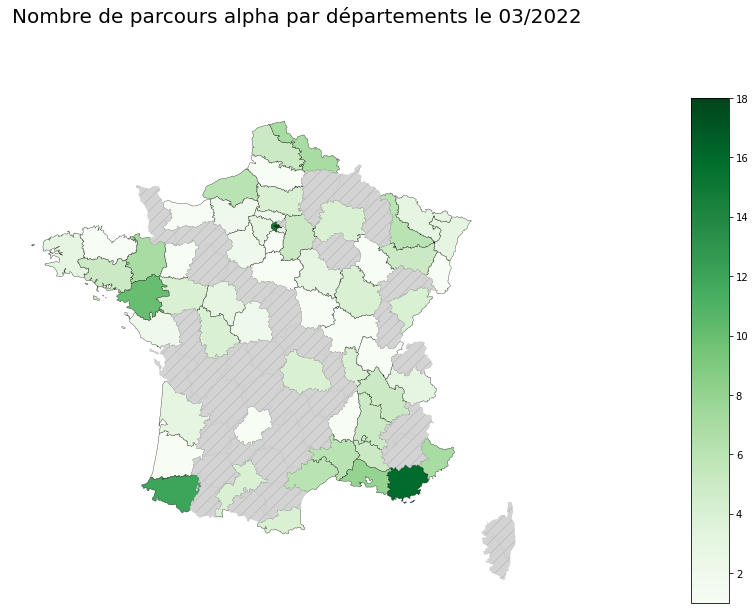

In [125]:
#croisement des données
departements["parcours"] = np.nan
list_dept = list(set(alpha_gb_dept.index)&set(departements.index))
departements.loc[list_dept, "parcours"] = alpha_gb_dept.loc[list_dept]

#création du graphe
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
departements.cx[:,40:60].plot(column = "parcours", ax=ax, legend=True, cax=cax, cmap='Greens', 
                              edgecolor='black', linewidth=0.3,
           missing_kwds={'color': 'lightgrey', "hatch": "//", "edgecolor":'silver'})
ax.set_axis_off();
plt.suptitle("Nombre de parcours alpha par départements le 03/2022", fontsize=20)
plt.savefig("images/alpha_dep.png")
plt.show()

# Régions alpha

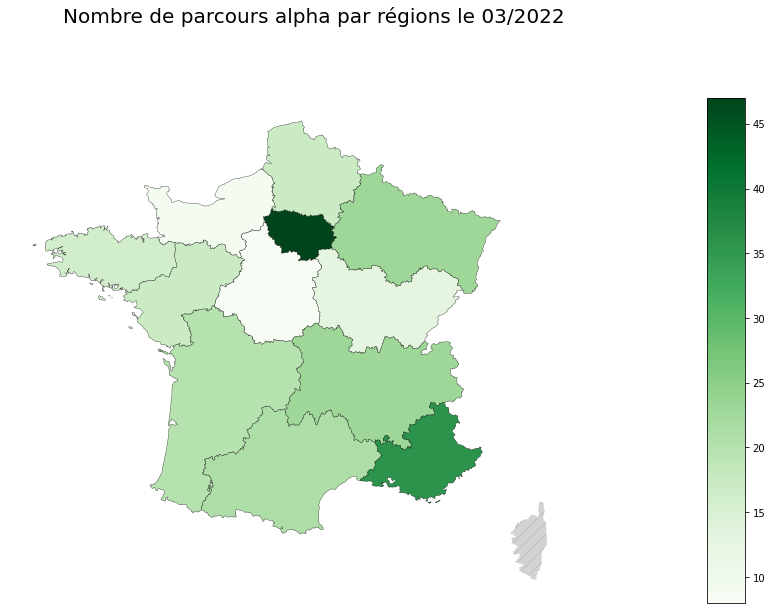

In [128]:
#croisement des données
regions["parcours"] = np.nan
list_reg = list(set(alpha_gb_reg.index)&set(regions.index))
regions.loc[list_reg, "parcours"] = alpha_gb_reg.loc[list_reg]

#création du graphe
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
regions.cx[:,40:60].plot(column = "parcours", ax=ax, legend=True, cax=cax, cmap='Greens', 
                              edgecolor='black', linewidth=0.3,
           missing_kwds={'color': 'lightgrey', "hatch": "//", "edgecolor":'silver'})
ax.set_axis_off();
plt.suptitle("Nombre de parcours alpha par régions le 03/2022", fontsize=20)
plt.savefig("images/alpha_reg.png")
plt.show()

# Départements famille

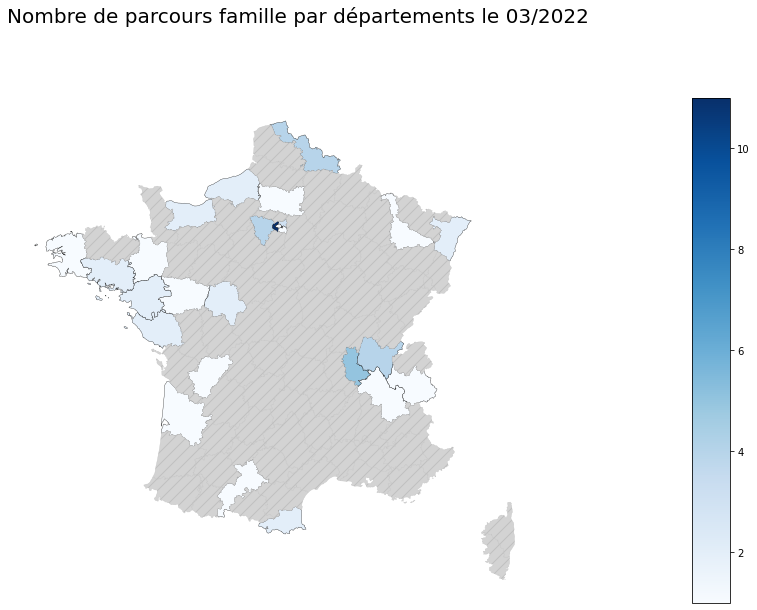

In [139]:
#croisement des données
departements["parcours"] = np.nan
list_dept = list(set(famille_gb_dept.index)&set(departements.index))
departements.loc[list_dept, "parcours"] = famille_gb_dept.loc[list_dept]

#création du graphe
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
departements.cx[:,40:60].plot(column = "parcours", ax=ax, legend=True, cax=cax, cmap='Blues', 
                              edgecolor='black', linewidth=0.3,
           missing_kwds={'color': 'lightgrey', "hatch": "//", "edgecolor":'silver'})
ax.set_axis_off();
plt.suptitle("Nombre de parcours famille par départements le 03/2022", fontsize=20)
plt.savefig("images/famille_dep.png")
plt.show()

# Régions famille

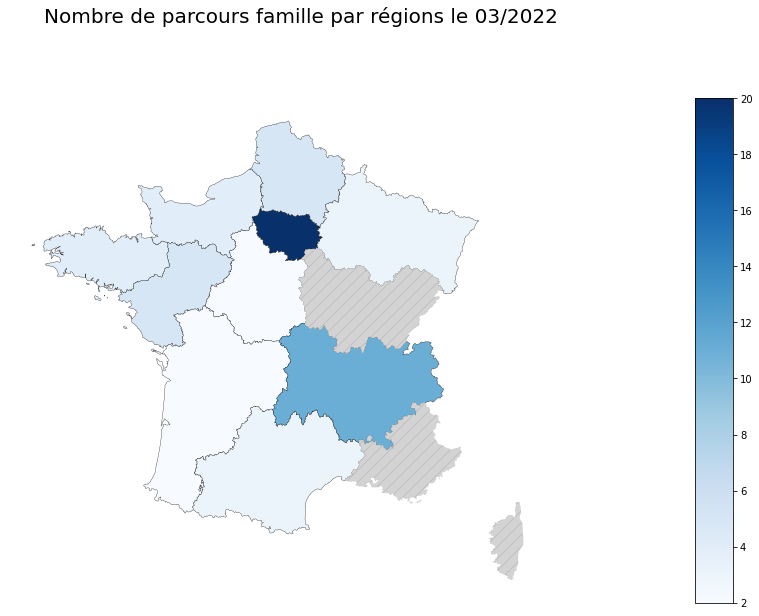

In [159]:
#croisement des données
regions["parcours"] = np.nan
list_reg = list(set(famille_gb_reg.index)&set(regions.index))
regions.loc[list_reg, "parcours"] = famille_gb_reg.loc[list_reg]

#création du graphe
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
regions.cx[:,40:60].plot(column = "parcours", ax=ax, legend=True, cax=cax, cmap='Blues', 
                              edgecolor='black', linewidth=0.3,
           missing_kwds={'color': 'lightgrey', "hatch": "//", "edgecolor":'silver'})
ax.set_axis_off();
plt.suptitle("Nombre de parcours famille par régions le 03/2022", fontsize=20)
plt.savefig("images/famille_reg.png")
plt.show()